In [4]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import matplotlib.dates as mdates
import seaborn as sns

In [5]:
# Store filepath in a variable
weather_file= "Data/CentralPark15-17.csv"
flu_incident_file= "Data/ILINet_2015_2017.csv"


In [6]:
# Read our Data file with the pandas library
# Not every CSV requires an encoding, but be aware this can come up
weather_file_df = pd.read_csv(weather_file, encoding = "ISO-8859-1")
weather_file_df.head()

,num,STATION,NAME,DATE,PRCP,SNOW,TAVG,TMAX,TMIN,YEAR,WEEK,WkStart,WkEnd,Mo_of_yr,MoY
0,3,USW00094728,"NY CITY CENTRAL PARK, NY US",2015-10,3.91,0.0,58.0,65.4,50.7,2015,40,10/5/2015,10/11/2015,October,10/1/2015
1,3,USW00094728,"NY CITY CENTRAL PARK, NY US",2015-10,3.91,0.0,58.0,65.4,50.7,2015,41,10/12/2015,10/18/2015,October,10/1/2015
2,3,USW00094728,"NY CITY CENTRAL PARK, NY US",2015-10,3.91,0.0,58.0,65.4,50.7,2015,42,10/19/2015,10/25/2015,October,10/1/2015
3,3,USW00094728,"NY CITY CENTRAL PARK, NY US",2015-10,3.91,0.0,58.0,65.4,50.7,2015,43,10/26/2015,11/1/2015,October,10/1/2015
4,4,USW00094728,"NY CITY CENTRAL PARK, NY US",2015-11,2.02,0.0,52.8,59.3,46.3,2015,44,11/2/2015,11/8/2015,November,11/1/2015


In [7]:
#Only grab specific columns from the CSV that we want to work with.
weath_summ_df = weather_file_df[["PRCP", "SNOW", "TAVG", "WkStart"]]
weath_summ_df.head()

,PRCP,SNOW,TAVG,WkStart
0,3.91,0.0,58.0,10/5/2015
1,3.91,0.0,58.0,10/12/2015
2,3.91,0.0,58.0,10/19/2015
3,3.91,0.0,58.0,10/26/2015
4,2.02,0.0,52.8,11/2/2015


In [8]:
#Read in the file containing our flu incidence outbreaks and check it out.
incident_file_df = pd.read_csv(flu_incident_file, encoding = "ISO-8859-1")
incident_file_df.head()

,REGION TYPE,REGION,YEAR,WEEK,WkStart,WkEnd,Mo_of_yr,MoY,% WEIGHTED ILI,%UNWEIGHTED ILI,AGE 0-4,AGE 25-49,AGE 25-64,AGE 5-24,AGE 50-64,AGE 65,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS
0,States,New York,2015,40,10/5/2015,10/11/2015,October,10/1/2015,X,0.588433,X,X,X,X,X,X,70,80,11896
1,States,New York,2015,41,10/12/2015,10/18/2015,October,10/1/2015,X,0.557203,X,X,X,X,X,X,62,80,11127
2,States,New York,2015,42,10/19/2015,10/25/2015,October,10/1/2015,X,0.859620,X,X,X,X,X,X,115,82,13378
3,States,New York,2015,43,10/26/2015,11/1/2015,October,10/1/2015,X,0.816171,X,X,X,X,X,X,107,83,13110
4,States,New York,2015,44,11/2/2015,11/8/2015,November,11/1/2015,X,0.655665,X,X,X,X,X,X,89,84,13574


In [9]:
#Again we are going to grab only what we want out of the CSV and check it out
inc_summ_df = incident_file_df[["WkStart","ILITOTAL" ]]
inc_summ_df.head()

,WkStart,ILITOTAL
0,10/5/2015,70
1,10/12/2015,62
2,10/19/2015,115
3,10/26/2015,107
4,11/2/2015,89


In [10]:
#We create a merge table of the flu incidents and the relevant weather info.
inc_weath_df = pd.merge(inc_summ_df, weath_summ_df, on ="WkStart")
inc_weath_df.head()

,WkStart,ILITOTAL,PRCP,SNOW,TAVG
0,10/5/2015,70,3.91,0.0,58.0
1,10/12/2015,62,3.91,0.0,58.0
2,10/19/2015,115,3.91,0.0,58.0
3,10/26/2015,107,3.91,0.0,58.0
4,11/2/2015,89,2.02,0.0,52.8


In [11]:
#Declare an x-axis for our plot that runs the length of the data.
x_axis =  np.arange(len(inc_weath_df))
x_axis

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85])

In [12]:
#We declare variables to hold our data for plotting Average Temp, Total Precipitation, and Flu Outbreaks
points_F = inc_weath_df["TAVG"]
prcp_total = inc_weath_df["PRCP"]

#Flu outbreak totals
inc_vol = inc_weath_df["ILITOTAL"]

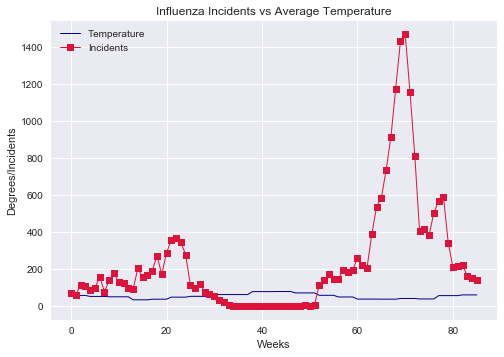

In [13]:
#Create a handle for each plot
temperature, = plt.plot(x_axis, points_F, marker="+",color="darkblue", linewidth=1, label="Temperature")
incidents, = plt.plot(x_axis, inc_vol, marker="s", color="crimson", linewidth=1, label="Incidents")

# Set our legend to where the chart thinks is best
plt.legend(handles=[temperature, incidents], loc="best")

# Create labels for the X and Y axis
plt.xlabel("Weeks")
plt.ylabel("Degrees/Incidents")
plt.title('Influenza Incidents vs Average Temperature')
plt.show()

In [14]:
#The above plot was one of our initial attemps to display correlations between temperature and flu outbreaks.  As you can see,
#it is not very effective since it displays both temp and number of incidents on the same y-axis.  We decided that it would be 
#best for us to look into plotting two separate y axes so that we could line up the data better.  See below.

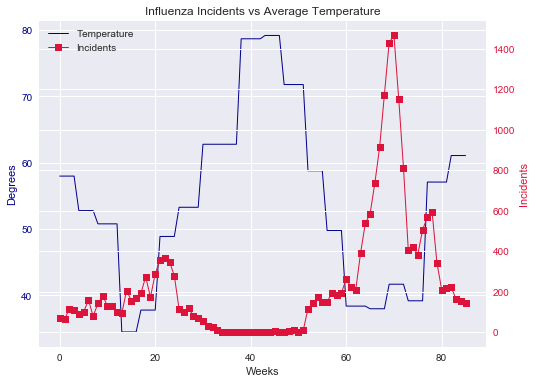

In [15]:
#Here we recreate the same plot but we have temperature and flu incidents on separate y axes.  
plt.clf()
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)
plot5, = ax1.plot(x_axis, points_F, marker="+", color="darkblue", linewidth=1, label="Temperature")
ax1.set_xlabel("Weeks")
ax1.set_ylabel('Degrees', color='darkblue')
for tl in ax1.get_yticklabels():
    tl.set_color('darkblue')
    
#We use the twin x-axis method so that both plots share the same x axis.
ax2 = ax1.twinx()
plot6, = ax2.plot(x_axis, inc_vol, marker="s", color="crimson", linewidth=1, label="Incidents")
ax2.set_ylabel('Incidents', color='crimson')
for tl in ax2.get_yticklabels():
    tl.set_color('crimson')
plt.legend(handles=[plot5, plot6], loc="best")
#plt.savefig('Incident_Weather2scales.png')
plt.title('Influenza Incidents vs Average Temperature')
plt.show()

In [16]:
#Clear the frame so that a new plot can be plotted properly
plt.clf()

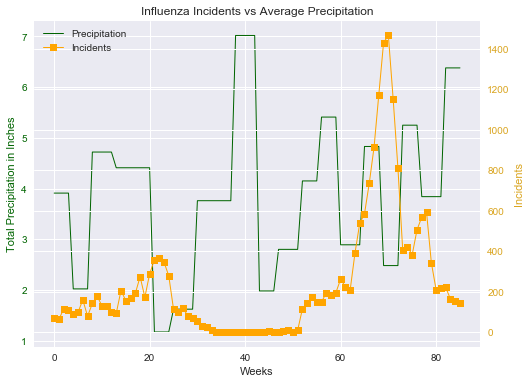

In [17]:
#Yet again, to better display the data, we added two separate y axes to our plot.

#Here is the code for our first y-axis plot
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)
plot3, = ax1.plot(x_axis, prcp_total, marker="+", color="darkgreen", linewidth=1, label="Precipitation")
ax1.set_xlabel("Weeks")
ax1.set_ylabel('Total Precipitation in Inches', color='darkgreen')
for tl in ax1.get_yticklabels():
    tl.set_color('darkgreen')
    
#Here is the code for our second y-axis plot
ax2 = ax1.twinx()
plot4, = ax2.plot(x_axis, inc_vol, marker="s", color="orange", linewidth=1, label="Incidents")
ax2.set_ylabel('Incidents', color='goldenrod')
for tl in ax2.get_yticklabels():
    tl.set_color('goldenrod')
    
#Add a legend, save the figure to a png file and display it.
plt.legend(handles=[plot3, plot4], loc="best")
plt.title('Influenza Incidents vs Average Precipitation')
plt.savefig('PrecipitationVSFluOutbreak.png')
plt.show()

In [18]:
#Here are are working on our data so we can plot Vaccination versus flu outbreak.
# Store filepath in a variable
flu_vacc_file1= "Data/NYVacc2015-16CalcData.csv"
flu_vacc_file2= "Data/NYVacc2016-17CalcData.csv"
vacc15_16 = pd.read_csv(flu_vacc_file1)
vacc16_17 = pd.read_csv(flu_vacc_file2)
vacc16_17.head()

,Month,Percentage,Sample_Size
0,Jul 2016,0.0045,46338
1,Aug 2016,0.0211,46338
2,Sep 2016,0.0998,46338
3,Oct 2016,0.2633,46338
4,Nov 2016,0.3526,46338


In [19]:
#Here we merge both Vaccine CSV files together
vacctotal = [vacc15_16, vacc16_17]
mergetotal = pd.concat(vacctotal)
mergetotal.head()

#Calculate the percent change in vaccinations from month to month.
mergetotal['Change']=mergetotal.Percentage.pct_change()
#mergetotal.to_csv("NYVacc2015-17.csv")

In [20]:
#Read in new vacc file with added column.  We also added in a separate date column in Excel so that we can work with other data.
flu_vacc_file4= "Data/NYVacc2015-17.csv"
vacc15_17 = pd.read_csv(flu_vacc_file4)
vacc15_17.head()

,Month_Short,Month,Percentage,Sample_Size,Change
0,15-Jul,7/1/2015,0.0053,50801,NaN
1,15-Aug,8/1/2015,0.0181,50801,2.415094
2,15-Sep,9/1/2015,0.0912,50801,4.038674
3,15-Oct,10/1/2015,0.2596,50801,1.846491
4,15-Nov,11/1/2015,0.3578,50801,0.378274


In [21]:
#Convert "Month" column to same date-time format as the other so they can be merged
vacc15_17['Month'] = pd.to_datetime(vacc15_17['Month'], format="%m/%d/%Y")
vacc15_17.head()

,Month_Short,Month,Percentage,Sample_Size,Change
0,15-Jul,2015-07-01,0.0053,50801,NaN
1,15-Aug,2015-08-01,0.0181,50801,2.415094
2,15-Sep,2015-09-01,0.0912,50801,4.038674
3,15-Oct,2015-10-01,0.2596,50801,1.846491
4,15-Nov,2015-11-01,0.3578,50801,0.378274


In [22]:
#Read in FLu Incidents file and check for accuracy
flu_incid= "Data/ILINet_2015_2017.csv"
fluout = pd.read_csv(flu_incid)
fluout.head()

,REGION TYPE,REGION,YEAR,WEEK,WkStart,WkEnd,Mo_of_yr,MoY,% WEIGHTED ILI,%UNWEIGHTED ILI,AGE 0-4,AGE 25-49,AGE 25-64,AGE 5-24,AGE 50-64,AGE 65,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS
0,States,New York,2015,40,10/5/2015,10/11/2015,October,10/1/2015,X,0.588433,X,X,X,X,X,X,70,80,11896
1,States,New York,2015,41,10/12/2015,10/18/2015,October,10/1/2015,X,0.557203,X,X,X,X,X,X,62,80,11127
2,States,New York,2015,42,10/19/2015,10/25/2015,October,10/1/2015,X,0.859620,X,X,X,X,X,X,115,82,13378
3,States,New York,2015,43,10/26/2015,11/1/2015,October,10/1/2015,X,0.816171,X,X,X,X,X,X,107,83,13110
4,States,New York,2015,44,11/2/2015,11/8/2015,November,11/1/2015,X,0.655665,X,X,X,X,X,X,89,84,13574


In [23]:
#Extract useful information from CSV file and put into new dataframe.
ili_groupby = fluout.groupby(['MoY'])
sum_ili = pd.DataFrame(ili_groupby['ILITOTAL'].sum())
sum_ili.index = sum_ili.index.to_datetime()
sorted_ili = sum_ili.sort_index(ascending=True)

C:\Users\menta\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)


In [24]:
#Reset the index of the new sorted dataframe, change the column name, and check it out
sortedILI =sorted_ili.reset_index()
sortedILI = sortedILI.rename(columns={"index": "Month"})
sortedILI.head()

,Month,ILITOTAL
0,2015-10-01,354
1,2015-11-01,423
2,2015-12-01,673
3,2016-01-01,619
4,2016-02-01,924


In [25]:
#Instead of using Excel, we found a way to convert our month and year data to datetime format to make this column play nice.
sortedILI
sortedILI['YEAR'], sortedILI['MONTH'] = sortedILI['Month'].dt.year, sortedILI['Month'].dt.month
sortedILI.head()

,Month,ILITOTAL,YEAR,MONTH
0,2015-10-01,354,2015,10
1,2015-11-01,423,2015,11
2,2015-12-01,673,2015,12
3,2016-01-01,619,2016,1
4,2016-02-01,924,2016,2


In [26]:
#Merge the two dataframes into one (Be one with the force Luke!)
merge_table = pd.merge(vacc15_17, sortedILI, on="Month")

#We toyed around with the idea of splitting up the data by flu seasons, we were able to split them because each season 
#unique sample sizes.
perc15_16 = merge_table.loc[merge_table["Sample_Size"] ==50801,:]
perc15_16

perc16_17 = merge_table.loc[merge_table["Sample_Size"] ==46338,:]
perc16_17.head()

,Month_Short,Month,Percentage,Sample_Size,Change,ILITOTAL,YEAR,MONTH
8,16-Jul,2016-07-01,0.0045,46338,NaN,3,2016,7
9,16-Aug,2016-08-01,0.0211,46338,3.688889,6,2016,8
10,16-Sep,2016-09-01,0.0998,46338,3.729858,22,2016,9
11,16-Oct,2016-10-01,0.2633,46338,1.638277,577,2016,10
12,16-Nov,2016-11-01,0.3526,46338,0.339157,718,2016,11


In [27]:
#Here we are getting things ready so that we can plot them.
#Create a variable for the x-axis and variables for y axis data 
x_axis = np.arange(len(merge_table))
x_axis

#Instead of using the split up data, we create variables to hold our data for plotting one x and two y axes.
percchange = merge_table["Percentage"]
inctotals = merge_table["ILITOTAL"]
monthinfo = merge_table["Month"]
monthinfo.head()


0   2015-10-01
1   2015-11-01
2   2015-12-01
3   2016-01-01
4   2016-02-01
Name: Month, dtype: datetime64[ns]

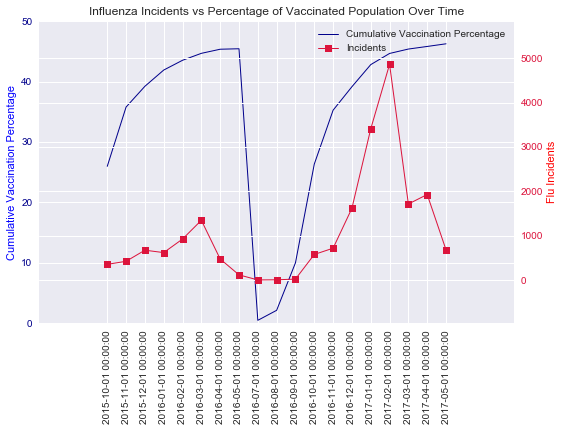

In [28]:
#Once again, to get the data to line up nicely with each other, we plot our data on two y axes.
plt.clf()
ax1.xaxis_date()

fig = plt.figure(figsize=(8, 6))
plt.xticks(x_axis, monthinfo, rotation= 'vertical')

#Here is the code for our first y-axis plot
ax1 = fig.add_subplot(111)
plot1, = ax1.plot(x_axis, (percchange*100), marker="+", color="darkblue", linewidth=1, label="Cumulative Vaccination Percentage")
ax1.set_ylabel('Cumulative Vaccination Percentage', color='b')
plt.ylim((0,50))
for tl in ax1.get_yticklabels():
    tl.set_color('darkblue')
    
#Here I attempted to remove the hour, minutes, and seconds from showing up in Matplotlib
#ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

#The code for our second y-axis plot
ax2 = ax1.twinx()
plot2, = ax2.plot(x_axis, inctotals, marker="s", color="crimson", linewidth=1, label="Incidents")
ax2.set_ylabel('Flu Incidents', color='r')
plt.legend(handles=[plot1, plot2], loc="best")
for tl in ax2.get_yticklabels():
    tl.set_color('crimson')
    
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)

#Save Plot and Display
plt.tight_layout()
plt.title('Influenza Incidents vs Percentage of Vaccinated Population Over Time')
plt.savefig("VaccineVSOutbreak.png")
plt.show()

In [29]:
#Reading in our Air Travel data 
airCsv1 = 'Data/2017_AirTravel_T_T100D_MARKET_ALL_CARRIER.csv'
airCsv2 = 'Data/2016_AirTravel_T100D_MARKET_ALL_CARRIER.csv'
airCsv3 = 'data/2015_AirTravel_T_T100D_MARKET_ALL_CARRIER.csv'

df_airtravel1 = pd.read_csv(airCsv1)
df_airtravel2 = pd.read_csv(airCsv2)
df_airtravel3 = pd.read_csv(airCsv3)

In [30]:
#Here we put all of our air travel data together using the append method
df_air = df_airtravel1
df_air = df_air.append(df_airtravel2)
df_air = df_air.append(df_airtravel3)
len(df_air)
df_air.head()

,PASSENGERS,DISTANCE,UNIQUE_CARRIER,AIRLINE_ID,UNIQUE_CARRIER_NAME,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,YEAR,MONTH,Unnamed: 19
0,0.0,249.0,09Q,21161.0,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...",10540,1054003,30540,BED,"Bedford, MA",MA,15096,1509602,35096,SYR,"Syracuse, NY",NY,2017,1,NaN
1,0.0,163.0,09Q,21161.0,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...",11764,1176402,31764,FRG,"East Farmingdale, NY",NY,10540,1054003,30540,BED,"Bedford, MA",MA,2017,1,NaN
2,0.0,749.0,09Q,21161.0,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...",11764,1176402,31764,FRG,"East Farmingdale, NY",NY,13232,1323202,30977,MDW,"Chicago, IL",IL,2017,1,NaN
3,0.0,1430.0,09Q,21161.0,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...",11789,1178904,30194,FTW,"Dallas/Fort Worth, TX",TX,11764,1176402,31764,FRG,"East Farmingdale, NY",NY,2017,1,NaN
4,0.0,525.0,09Q,21161.0,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...",11995,1199502,31995,GSO,"Greensboro/High Point, NC",NC,15096,1509602,35096,SYR,"Syracuse, NY",NY,2017,1,NaN


In [31]:
#Here we get only the relevant air travel data that we need
df_air_ny = df_air.loc[(df_air['DEST_STATE_ABR']=='NY')| (df_air['ORIGIN_STATE_ABR']=='NY'),:]
len(df_air_ny)

#Just like we did above, we tried to separate out the two separate flu seasons but we decided against that.

# df_air15_16 = df_air_ny.loc[(df_air_ny["YEAR"]==2015) | (df_air_ny["YEAR"]==2016), :]
# df_air15_16.head(100)
# df_air16_17 = df_air_ny.loc[(df_air_ny["YEAR"]==2016) | (df_air_ny["YEAR"]==2017), :]

54769

In [32]:
# Here we grabbed only the columns that we wanted, note we have code for if we wanted to separate out by year
df_air_ny_grp = df_air_ny[['YEAR','MONTH','PASSENGERS','DISTANCE','ORIGIN','ORIGIN_CITY_NAME','ORIGIN_STATE_ABR','DEST','DEST_CITY_NAME','DEST_STATE_ABR']]
# df_air_ny_grp2 = df_air16_17[['YEAR','MONTH','PASSENGERS','DISTANCE','ORIGIN','ORIGIN_CITY_NAME','ORIGIN_STATE_ABR','DEST','DEST_CITY_NAME','DEST_STATE_ABR']]

df_air_ny_depart = df_air_ny_grp.loc[df_air_ny_grp['ORIGIN_STATE_ABR']=='NY']
df_air_ny_arrive = df_air_ny_grp.loc[df_air_ny_grp['DEST_STATE_ABR']=='NY']


#Here we groupby Year and Month
df_air_ny_arrive = df_air_ny_arrive.groupby(['YEAR','MONTH'])
df_air_ny_depart = df_air_ny_depart.groupby(['YEAR','MONTH'])

# df_air_ny_grp2 = df_air_ny_grp2.groupby(['YEAR','MONTH'])

#We create a dataframe out of our groupby 
df_air_summary_arrive = pd.DataFrame(df_air_ny_arrive[['PASSENGERS','DISTANCE']].sum())
df_air_summary_depart = pd.DataFrame(df_air_ny_depart[['PASSENGERS','DISTANCE']].sum())
# df_air_summary2 = pd.DataFrame(df_air_ny_grp2[['PASSENGERS','DISTANCE']].sum())

#Next we reset the index and then sort by Year and Month
df_air_summary_arrive = df_air_summary_arrive.reset_index()
df_air_summary_arrive.sort_values(by=['YEAR','MONTH'],ascending=True)
df_air_summary_depart = df_air_summary_depart.reset_index()
df_air_summary_depart.sort_values(by=['YEAR','MONTH'],ascending=True)

#Merge the two tables into 1 to get net passenger counts and rename columns
df_air_summary = pd.merge(df_air_summary_arrive,df_air_summary_depart,on=["YEAR", "MONTH"])
df_air_summary = df_air_summary.rename(columns={"PASSENGERS_x": "PASSENGERS_ARRIVALS",
                                              "DISTANCE_x":"DISTANCE_ARRIVALS",
                                              "PASSENGERS_y":"PASSENGERS_DEPARTURES",
                                              "DISTANCE_y":"DISTANCE_DEPARTURES"})
# df_air_summary2 = df_air_summary2.reset_index()
# df_air_summary2.sort_values(by=['YEAR','MONTH'],ascending=True)
#Create net passengers field
df_air_summary['PASSENGERS_NET']=df_air_summary['PASSENGERS_ARRIVALS'] - df_air_summary['PASSENGERS_DEPARTURES']

#We print the summary out so that we can make sure our dates are in order
df_air_summary.head()


,YEAR,MONTH,PASSENGERS_ARRIVALS,DISTANCE_ARRIVALS,PASSENGERS_DEPARTURES,DISTANCE_DEPARTURES,PASSENGERS_NET
0,2015,1,2356155.0,792359.0,2353409.0,799801.0,2746.0
1,2015,2,2267675.0,752947.0,2289513.0,740820.0,-21838.0
2,2015,3,2899704.0,801939.0,2879758.0,821547.0,19946.0
3,2015,4,2988061.0,803414.0,2883747.0,814958.0,104314.0
4,2015,5,3097146.0,760320.0,2992081.0,756625.0,105065.0


In [33]:
#Here we merge in our Air travel and FLu incident data 
mergeairflu = pd.merge(df_air_summary, sortedILI, on=["YEAR", "MONTH"])
mergeairflu.head()

#This data below would have been used if we had separated out the two separate flu seasons
# mergeairflu2 = pd.merge(df_air_summary2, sortedILI, on=["YEAR", "MONTH"])
# mergeairflu2

# mergeairflu = mergeairflu1
# mergeairflu = mergeairflu.append(mergeairflu2)
# mergeairflu

,YEAR,MONTH,PASSENGERS_ARRIVALS,DISTANCE_ARRIVALS,PASSENGERS_DEPARTURES,DISTANCE_DEPARTURES,PASSENGERS_NET,Month,ILITOTAL
0,2015,10,2994272.0,732786.0,3048476.0,699574.0,-54204.0,2015-10-01,354
1,2015,11,2795111.0,812500.0,2796846.0,787912.0,-1735.0,2015-11-01,423
2,2015,12,2819843.0,842319.0,2911418.0,822705.0,-91575.0,2015-12-01,673
3,2016,1,2495212.0,822524.0,2496939.0,818469.0,-1727.0,2016-01-01,619
4,2016,2,2462873.0,717590.0,2473264.0,706687.0,-10391.0,2016-02-01,924


In [34]:

#Create our first variable to hold the Air Passenger totals
data1 = mergeairflu['PASSENGERS_NET']/1000

#Create a second variable to hold our Flu totals
data2 = mergeairflu['ILITOTAL']

#Check out the data types so that we can make sure they aren't naughty when around one another.
mergeairflu.dtypes

YEAR                              int64
MONTH                             int64
PASSENGERS_ARRIVALS             float64
DISTANCE_ARRIVALS               float64
PASSENGERS_DEPARTURES           float64
DISTANCE_DEPARTURES             float64
PASSENGERS_NET                  float64
Month                    datetime64[ns]
ILITOTAL                          int64
dtype: object

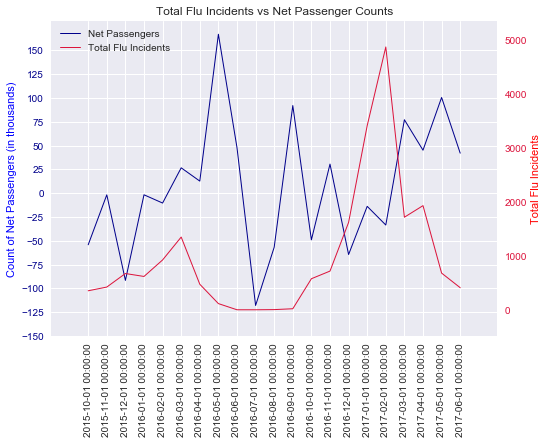

In [35]:
#Here we plot our Air travel versus the total flu incidents
plt.clf()
#Set our x_axis to run the length of our dataframe
x_axis = np.arange(len(mergeairflu))
fig = plt.figure(figsize=(8, 6))

#Here is our first y-axis plot
ax1 = fig.add_subplot(111)
x_label = mergeairflu['Month']
plt.xticks(x_axis, x_label, rotation= 90)
plot7, = ax1.plot(x_axis, data1, marker="+", color="darkblue", linewidth=1, label="Net Passengers")
ax1.set_ylabel('Count of Net Passengers (in thousands)', color='b')
ax1.set_yticks(np.arange(-150,175,25))
for tl in ax1.get_yticklabels():
    tl.set_color('darkblue')
    
#Here is our second y-axis plot
ax2 = ax1.twinx()
plot8, = ax2.plot(x_axis, data2, color="crimson", linewidth=1, label="Total Flu Incidents")
ax2.set_ylabel('Total Flu Incidents', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('crimson')
plt.legend(handles=[plot7, plot8], loc="best")

# Pad margins so that markers don't get clipped by the axes
plt.margins(0.1)
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)
plt.title('Total Flu Incidents vs Net Passenger Counts')
ax2.grid(False)


#Save Plot and Display
#\plt.tight_layout()
plt.savefig("AirTravelVSOutbreak.png")
plt.show()

In [36]:
#In the plot above, we have the total number of inbound air passengers to NY.  